In [42]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import StoneHelper
import StoneModel

importlib.reload(StoneHelper)
importlib.reload(StoneModel)

Rquant = StoneModel.StoneModel().Rquant

M, dset = StoneHelper.read_chain("mcmc_chain.h5")

bestIDX = np.argmax(dset['LL'])

p = dset.iloc[bestIDX,:][2:].as_matrix()

# Trim the burn in period
dset = dset.iloc[300::,:]

Index(['LL', 'walker', 'Rexp', 'Rexp', 'Rexp', 'Rexp', 'Rexp', 'Rexp', 'Kx1',
       'sigConv1', 'sigConv2', 'gnu1', 'gnu2', 'sigma', 'sigma2'],
      dtype='object')


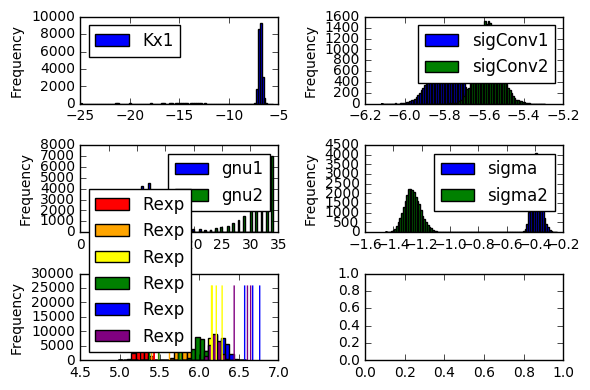

In [43]:
print(dset.columns)

fig, axes = plt.subplots(nrows=3, ncols=2)
colors = ['red','orange','yellow','green','blue','purple']

dset[['Kx1'     ]].plot.hist(ax=axes[0,0], bins = 100)
dset[['sigConv1', 'sigConv2']].plot.hist(ax=axes[0,1], bins = 100)
dset[['gnu1', 'gnu2'        ]].plot.hist(ax=axes[1,0], bins = 100)
dset[['sigma', 'sigma2'     ]].plot.hist(ax=axes[1,1], bins = 100)
dset[['Rexp'   ]].plot.hist(ax=axes[2,0], bins = 30,color=colors)
for j in range(len(colors)):
    fcgr = Rquant[j]
    for meas in fcgr:
        axes[2,0].plot(np.repeat(meas,dset.shape[0]),np.arange(0,dset.shape[0]),color=colors[j])

plt.tight_layout()

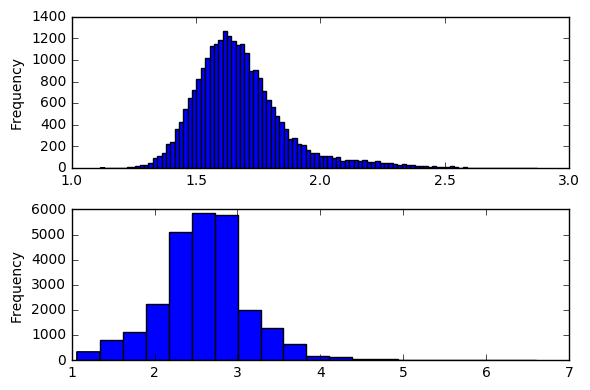

In [44]:
dset = dset.assign(sigDiff = lambda x: np.power(10, x.sigConv2 - x.sigConv1))
dset = dset.assign(gnuDiff = lambda x: x.gnu2 / x.gnu1)

fig, axes = plt.subplots(nrows=2, ncols=1)

dset['sigDiff'].plot.hist(ax=axes[0], bins = 100)
dset['gnuDiff'].plot.hist(ax=axes[1], bins = 20)

plt.tight_layout()

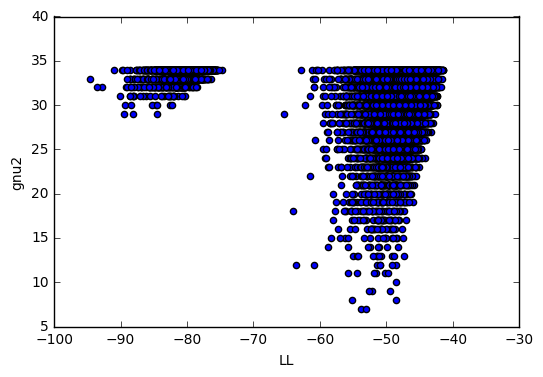

In [45]:
dset.plot('LL', 'gnu2', 'scatter')

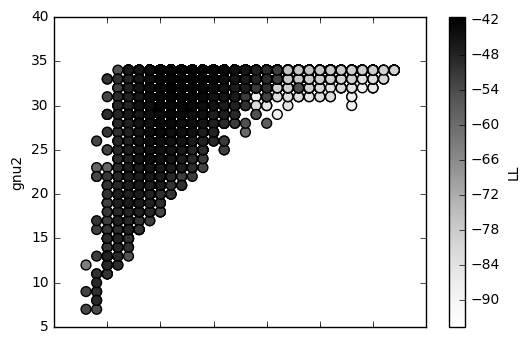

In [46]:
dsett = dset.sort_values(by = 'LL')

dsett.plot(x = 'gnu1', y = 'gnu2', kind = 'scatter', c = 'LL', s = 50)
#plt.xlabel('gnu1')